In [9]:
import pandas as pd

In [10]:
# Cargar el archivo Excel
df = pd.read_excel('/content/ramen-ratings.xlsx')

# Mostrar las primeras filas para inspeccionar
df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [11]:
# realizamos la imprtacion de calidad datos de la funcion exploracion para realizar un analisis exploratorio
from exploracion import calidad_datos

In [12]:
# Evaluar la calidad de los datos
calidad = calidad_datos(df)

# Mostrar el resultado
calidad

,tipo,nan,porcentaje_nan,ceros,porcentaje_ceros,count,unique,top,freq,mean,std,min,25%,50%,75%,max,IQR,lim_inf,lim_sup,atipicos
Review #,int64,0,0.000000,0,0.000000,2580.0,NaN,NaN,NaN,1290.5,744.926171,1.0,645.75,1290.5,1935.25,2580.0,1289.5,-1288.5,3869.5,0
Brand,object,0,0.000000,0,0.000000,2580,355,Nissin,381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Variety,object,0,0.000000,0,0.000000,2580,2412,Beef,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Style,object,2,0.077519,0,0.000000,2578,7,Pack,1531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Country,object,0,0.000000,0,0.000000,2580,38,Japan,352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Stars,object,0,0.000000,26,1.007752,2580.0,43.0,4.0,393.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Top Ten,object,2539,98.410853,0,0.000000,41,38,\n,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


Stars (variable objetivo probable):

Es de tipo object, cuando debería ser numérica para análisis y modelado.
Tiene valores como 'Unrated' o símbolos extraños que están causando el tipo object.
Tiene 26 ceros (aproximadamente 1%), que podrían ser sospechosos si "0 estrellas" no tiene sentido en el contexto.

In [13]:
# vamos a Convertir la columna Stars a tipo numérico y manejar errores:
df['Stars'] = pd.to_numeric(df['Stars'], errors='coerce')
#Esto convertirá los valores como 'Unrated' en NaN.

In [14]:
#Top Ten Tiene 98.4% de valores nulos, así que casi no aporta valor.  Posible acción: Eliminarla si no se piensa usar:
df.drop(columns='Top Ten', inplace=True)
#Style:Tiene solo 2 nulos. Puede rellenarse con "Unknown":
df['Style'] = df['Style'].fillna('Unknown')

In [15]:
# volvemos a ejecutar la funcion de calidad

calidad_limpia = calidad_datos(df)
calidad_limpia

,tipo,nan,porcentaje_nan,ceros,porcentaje_ceros,count,unique,top,freq,mean,std,min,25%,50%,75%,max,IQR,lim_inf,lim_sup,atipicos
Review #,int64,0,0.000000,0,0.000000,2580.0,NaN,NaN,NaN,1290.5,744.926171,1.0,645.75,1290.5,1935.25,2580.0,1289.5,-1288.5,3869.5,0
Stars,float64,3,0.116279,26,1.007752,2577.0,NaN,NaN,NaN,3.654676,1.015331,0.0,3.25,3.75,4.25,5.0,1.0,1.75,5.75,129
Brand,object,0,0.000000,0,0.000000,2580,355,Nissin,381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Variety,object,0,0.000000,0,0.000000,2580,2412,Beef,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Style,object,0,0.000000,0,0.000000,2580,8,Pack,1531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Country,object,0,0.000000,0,0.000000,2580,38,Japan,352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


hora los datos está un poco mas limpios

In [17]:
# imputamos valores nulos
df['Stars'] = df['Stars'].fillna(df['Stars'].median())

In [18]:
#codificamos variables categoricas
top_brands = df['Brand'].value_counts().nlargest(10).index
df['Brand'] = df['Brand'].apply(lambda x: x if x in top_brands else 'Other')

In [19]:
#codificamos todo
df_encoded = pd.get_dummies(df, columns=['Style', 'Country', 'Brand'], drop_first=True)

In [20]:
#Vamos a estandarizar solo Stars, porque es la única numérica y es la que usaremos como target o como feature:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded['Stars'] = scaler.fit_transform(df_encoded[['Stars']])

In [21]:
# entrenamientio y prueba
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['Stars'])
y = df_encoded['Stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
#Vamos a crear una nueva columna "Good_Bad" para clasificar los paquetes:
import numpy as np
df['Good_Bad'] = np.where(df['Stars'] >= 4, 'Good', 'Bad')
#Esto convierte a Stars en una columna categórica con dos valores: "Good" o "Bad".

In [24]:
#Codificamos las variables categóricas y normalizamos Stars como ya hicimos antes
# Codificación y normalización
df_encoded = pd.get_dummies(df, columns=['Style', 'Country', 'Brand'], drop_first=True)

# Creación de variable objetivo 'Good_Bad'
X = df_encoded.drop(columns=['Stars', 'Good_Bad'])
y = df_encoded['Good_Bad']

In [31]:
# Crear la columna objetivo basada en Stars (umbral de 3.5)
df['Rating'] = df['Stars'].apply(lambda x: 1 if x >= 3.5 else 0)

# Definir X (características) y y (objetivo)
X = df.drop(columns=['Review #', 'Stars', 'Rating', 'Variety'])  # Excluir columnas irrelevantes
y = df['Rating']  # La variable objetivo

# Verifica que las columnas están correctas
print(X.head())
print(y.head())

    Brand Style Country Good_Bad
0   Other   Cup   Japan      Bad
1   Other  Pack  Taiwan      Bad
2  Nissin   Cup     USA      Bad
3   Other  Pack  Taiwan      Bad
4   Other  Pack   India      Bad
0    1
1    0
2    0
3    0
4    1
Name: Rating, dtype: int64


In [32]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar la división
print(f"Entrenamiento: {X_train.shape}, Prueba: {X_test.shape}")

Entrenamiento: (2064, 4), Prueba: (516, 4)


In [34]:
# Codificar las variables categóricas (todas las columnas que son de tipo objeto)
X_encoded = pd.get_dummies(X)

# Verificar la codificación de las primeras filas
print(X_encoded.head())

   Brand_Indomie  Brand_Lucky Me!  Brand_Mama  Brand_Maruchan  Brand_Myojo  \
0          False            False       False           False        False   
1          False            False       False           False        False   
2          False            False       False           False        False   
3          False            False       False           False        False   
4          False            False       False           False        False   

   Brand_Nissin  Brand_Nongshim  Brand_Other  Brand_Ottogi  Brand_Paldo  ...  \
0         False           False         True         False        False  ...   
1         False           False         True         False        False  ...   
2          True           False        False         False        False  ...   
3         False           False         True         False        False  ...   
4         False           False         True         False        False  ...   

   Country_South Korea  Country_Sweden  Country_Ta

In [35]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Establecer el escalador
scaler = StandardScaler()

# Ajustar y transformar las características de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformar las características de prueba
X_test_scaled = scaler.transform(X_test)

# Verificar que la transformación fue exitosa
print(X_train_scaled[:5])

[[-0.15264971 -0.11937594 -0.16852477 -0.17303214 -0.16234238 -0.42120085
  -0.19011728  0.75628869 -0.13133879 -0.16390751 -0.12746825  0.
  -0.47196273 -0.05399492  0.         -0.45499181  0.81600218 -0.21103178
  -0.02201661 -0.09379581 -0.05399492 -0.04406526 -0.04406526 -0.12746825
  -0.26244281 -0.04927843 -0.02201661 -0.03114373 -0.03114373 -0.03815238
  -0.10138541 -0.02201661 -0.04406526 -0.23497813 -0.06237829 -0.10846523
   4.2350655  -0.40593787 -0.247351   -0.09891782 -0.07319845 -0.07961389
  -0.07961389 -0.02201661 -0.05399492 -0.13877773 -0.03815238 -0.03815238
  -0.2072462  -0.35586171 -0.03815238 -0.31656472 -0.27893868 -0.17154135
  -0.37460845 -0.02201661 -0.20977624  0.87844967 -0.87844967]
 [-0.15264971 -0.11937594 -0.16852477 -0.17303214 -0.16234238 -0.42120085
  -0.19011728  0.75628869 -0.13133879 -0.16390751 -0.12746825  0.
   2.11881139 -0.05399492  0.         -0.45499181 -1.22548692 -0.21103178
  -0.02201661 -0.09379581 -0.05399492 -0.04406526 -0.04406526 -0.

In [36]:
# Entrenar el modelo de regresión logística
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Predicciones en el conjunto de prueba
y_pred_logreg = logreg.predict(X_test_scaled)

# Evaluar el modelo
print("Regresión Logística - Resultados:")
print(classification_report(y_test, y_pred_logreg))

Regresión Logística - Resultados:
              precision    recall  f1-score   support

           0       0.57      0.69      0.62       142
           1       0.87      0.80      0.83       374

    accuracy                           0.77       516
   macro avg       0.72      0.74      0.73       516
weighted avg       0.79      0.77      0.78       516



Precisión:
Para la clase 0 (malo): 0.57
Para la clase 1 (bueno): 0.87 Esto indica que el modelo es más preciso al predecir los paquetes de ramen buenos (clase 1) que los paquetes malos (clase 0).
Recall:
Para la clase 0 (malo): 0.69
Para la clase 1 (bueno): 0.80 El recuerdo es un poco más alto para la clase 1, lo que sugiere que el modelo captura mejor los ejemplos de la clase buena.
F1-Score:
Para la clase 0 (malo): 0.62
Para la clase 1 (bueno): 0.83 El F1-Score es una buena combinación entre precisión y recuerdo. El modelo tiene un F1 más alto para la clase 1, lo que indica que es más equilibrado para predecir los paquetes buenos.
Accuracy: 0.77 La exactitud total es 77%, lo cual es un buen punto de partida. Esto significa que el modelo acierta el 77% de las veces.
Promedio macro y ponderado:
Macro promedio: Calcula la media de las métricas para cada clase sin ponderar por el tamaño de cada clase.
Promedio ponderado: Calcula la media de las métricas ponderada por el tamaño de cada clase, lo que es útil cuando tienes clases desbalanceadas.

In [38]:
# Importar SVC para Support Vector Machine
from sklearn.svm import SVC

# Entrenar el modelo SVM
svm = SVC()
svm.fit(X_train_scaled, y_train)

# Predicciones en el conjunto de prueba
y_pred_svm = svm.predict(X_test_scaled)

# Evaluar el modelo
from sklearn.metrics import classification_report
print("SVM - Resultados:")
print(classification_report(y_test, y_pred_svm))

SVM - Resultados:
              precision    recall  f1-score   support

           0       0.54      0.74      0.63       142
           1       0.89      0.76      0.82       374

    accuracy                           0.76       516
   macro avg       0.71      0.75      0.72       516
weighted avg       0.79      0.76      0.77       516



Precisión (Precision):
Para la clase 0 (malo): 0.54
Para la clase 1 (bueno): 0.89 Al igual que en la regresión logística, el modelo tiene una mayor precisión para la clase 1 (bueno), lo que indica que es más preciso al predecir los paquetes buenos.
Recall:
Para la clase 0 (malo): 0.74
Para la clase 1 (bueno): 0.76 En este caso, el recuerdo para la clase 0 (malo) es más alto que en la regresión logística, lo que significa que el modelo tiene un mejor rendimiento al identificar los paquetes malos.
F1-Score:
Para la clase 0 (malo): 0.63
Para la clase 1 (bueno): 0.82 El F1-Score sigue mostrando que el modelo es mejor para predecir la clase 1 (bueno), aunque con un F1 ligeramente menor para la clase 0 en comparación con la regresión logística.
Accuracy: 0.76 La exactitud total es 76%, lo que es similar al rendimiento de la regresión logística (77%). El modelo SVM también está acertando en alrededor del 76% de los casos.
Promedio macro y ponderado:
Macro promedio: La media de las métricas para cada clase es de 0.71 en precisión, 0.75 en recuerdo y 0.72 en F1-Score.
Promedio ponderado: Calculando la media ponderada por el tamaño de cada clase, la precisión es 0.79, el recuerdo es 0.76 y el F1-Score es 0.77.

Comparación:
Regresión Logística tiene un rendimiento ligeramente superior en términos de F1-Score para la clase 1 (bueno), pero SVM tiene un mejor recuerdo para la clase 0 (malo).
Ambos modelos tienen una exactitud similar (alrededor del 76-77%), pero el rendimiento en cada clase varía un poco.

In [44]:
# Calcular AUC-ROC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


# Crear el modelo con probability=True
svm = SVC(probability=True)

# Entrenar el modelo como antes
svm.fit(X_train_scaled, y_train)

# Ahora puedes usar predict_proba sin problemas
y_proba_svm = svm.predict_proba(X_test_scaled)[:, 1]

roc_auc_svm = roc_auc_score(y_test, y_proba_svm)
print("AUC-ROC para SVM:", roc_auc_svm)

AUC-ROC para SVM: 0.8467556676960156


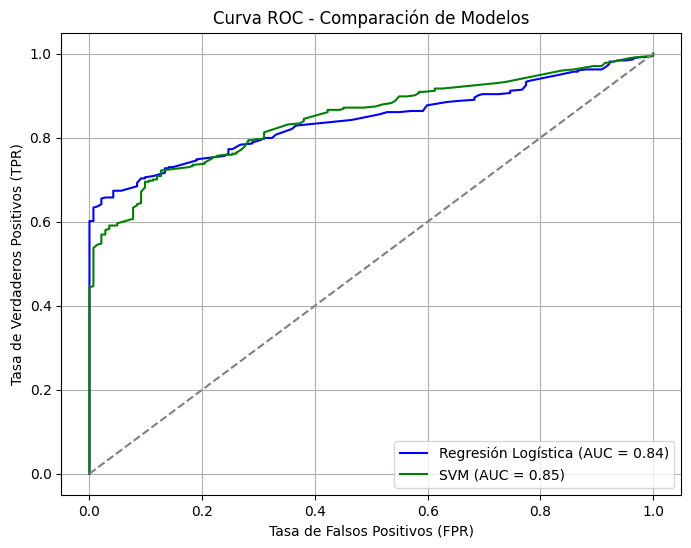

In [46]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Curva ROC - Regresión Logística
y_proba_logreg = logreg.predict_proba(X_test_scaled)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_logreg)
roc_auc_log = auc(fpr_log, tpr_log)

# Curva ROC - SVM (con probability=True)
y_proba_svm = svm.predict_proba(X_test_scaled)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, color='blue', label=f'Regresión Logística (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_svm, tpr_svm, color='green', label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Comparación de Modelos')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Ambos modelos tienen un rendimiento muy similar, con precisión y F1-score altos.
SVM tiene un AUC-ROC ligeramente superior, lo que indica mejor capacidad para distinguir entre clases.
Regresión logística presenta mayor recall en la clase positiva ("bueno"), lo que podría ser preferible si el objetivo es detectar todos los casos buenos aunque haya más falsos positivos.
SVM muestra mayor precisión, lo cual es útil si se quiere minimizar los falsos positivos.

Ambos modelos son válidos y fuertes candidatos.
Si se busca un modelo interpretable y más fácil de implementar usar Regresión Logística.
Si se prioriza la capacidad predictiva ligeramente superior usar SVM.